# _Modilisation_

In [673]:
# Importation librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encodage
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Normalization
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer

# Imputation
from sklearn.impute import SimpleImputer

# Featurs selection

# Création de pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector

# Séparateur de jeu de données
from sklearn.model_selection import train_test_split 

# Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Métrics
from sklearn.metrics import *
from sklearn.preprocessing import *

# Cross validation 
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

In [674]:
#visualiser l'ensemble du dataframe, toutes les lignes et colonnes.Faire apparaitre l'ensemble des informations.
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_column", 200)
pd.set_option("display.max_colwidth", 15)

# 1/ La récupération de données: 

In [676]:
data_set =pd.read_csv("D:\\Projet Classrooms\\Projet_4\\data_fnl.csv")
data_set =pd.read_csv("D:\\Projet Classrooms\\Projet_4\\data_flt.csv")
data = data_set.copy()
data

,BuildingType,PrimaryPropertyType,AgeOfBuilding,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,88.0,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0,62.5,7.103895e+06,249.705
1,NonResidential,Hotel,19.0,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0,56.0,8.371084e+06,279.685
2,NonResidential,Hotel,89.0,DOWNTOWN,47.61390,-122.33283,1.0,11.0,83008.0,26.0,6.005818e+06,192.300
3,Multifamily...,Mid-Rise Mu...,105.0,DOWNTOWN,47.60284,-122.33184,1.0,6.0,63712.0,1.5,4.580504e+06,160.560
4,NonResidential,Hotel,87.0,DOWNTOWN,47.60699,-122.33346,1.0,9.0,65009.0,43.5,6.701642e+06,331.550
...,...,...,...,...,...,...,...,...,...,...,...,...
2404,Multifamily...,Low-Rise Mu...,1.0,LAKE UNION,47.65295,-122.35593,1.0,4.0,41403.0,88.0,1.170777e+06,28.080
2405,Multifamily...,Mid-Rise Mu...,1.0,NORTHEAST,47.66366,-122.31450,1.0,7.0,63825.0,99.0,2.337651e+06,54.760
2406,Multifamily...,Mid-Rise Mu...,1.0,EAST,47.60189,-122.32182,1.0,6.0,86045.0,84.0,2.161240e+06,15.070
2407,Multifamily...,Mid-Rise Mu...,1.0,SOUTHWEST,47.55976,-122.38320,1.0,7.0,208136.0,100.0,3.552185e+06,96.900


In [677]:
data.shape

(2409, 12)

In [678]:
data.dtypes

BuildingType            object
PrimaryPropertyType     object
AgeOfBuilding          float64
Neighborhood            object
Latitude               float64
Longitude              float64
NumberofBuildings      float64
NumberofFloors         float64
PropertyGFATotal       float64
ENERGYSTARScore        float64
SiteEnergyUse(kBtu)    float64
TotalGHGEmissions      float64
dtype: object

# Encodage
******
    * LabelEncoder(): This transformer should be used to encode target values, *i.e.* `y`, and not the input `X`.
      les valeur présentées en décimale
      
    * LabelBinarizer() : les valeurs présentées en binaire sous forme d'une matrice
    
    * MultiLabelBinarizer() : les valeurs présentées en binaire sous forme d'une matrice
    
    * OneHotEncoder() : les valeurs présentées en binaire sous forme d'une matrice, résiste aux valeurs aberrantes
    
    * OrdinalEncoder() : les valeurs présentées en décimale, sensible aux valeurs aberrantes
    
****

    * pour l'encodage on a le choix entre OrdinalEncoder ou bien OnHotEncoder, vu qu'on a traité les valeurs aberrantes on peut utiliser OrdinalEncoder

***
# Séparation jeu de données

## Sans ENERGYSTARScore


* la somme des carrés des résidus (RSS) ;

* la moyenne de cette somme (MSE) ;

* la racine carrée de cette moyenne (RMSE).
        
***

In [886]:
# Dans un premier temps on modilise sans la variable ENERGYSTARScore 
X = data.iloc[:, 0:9]
X

,BuildingType,PrimaryPropertyType,AgeOfBuilding,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal
0,NonResidential,Hotel,88.0,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0
1,NonResidential,Hotel,19.0,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0
2,NonResidential,Hotel,89.0,DOWNTOWN,47.61390,-122.33283,1.0,11.0,83008.0
3,Multifamily...,Mid-Rise Mu...,105.0,DOWNTOWN,47.60284,-122.33184,1.0,6.0,63712.0
4,NonResidential,Hotel,87.0,DOWNTOWN,47.60699,-122.33346,1.0,9.0,65009.0
...,...,...,...,...,...,...,...,...,...
2404,Multifamily...,Low-Rise Mu...,1.0,LAKE UNION,47.65295,-122.35593,1.0,4.0,41403.0
2405,Multifamily...,Mid-Rise Mu...,1.0,NORTHEAST,47.66366,-122.31450,1.0,7.0,63825.0
2406,Multifamily...,Mid-Rise Mu...,1.0,EAST,47.60189,-122.32182,1.0,6.0,86045.0
2407,Multifamily...,Mid-Rise Mu...,1.0,SOUTHWEST,47.55976,-122.38320,1.0,7.0,208136.0


In [887]:
y_SiteEnergyUse = data['SiteEnergyUse(kBtu)']

In [888]:
y_TotalGHGEmissions= data['TotalGHGEmissions']

In [870]:
cat_var = list(data.select_dtypes(include=['object']).columns)
cat_var

['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

In [871]:
num_var = list(X.drop(columns = cat_var))
num_var

['AgeOfBuilding',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal']

# Pipeline and Preprocessing
***
    * Pipelines : chaînage des préprocesseurs et des estimateurs Les transformateurs et les estimateurs (prédicteurs) peuvent être combinés en un seul objet unificateur : a Pipeline.
    * Le pipeline offre la même API qu'un estimateur standard : il peut être ajusté et utilisé pour la prédiction avec fitet predict. 
    * l'utilisation d'un pipeline vous évitera également les fuites de données, c'est-à-dire la divulgation de certaines données de test dans vos données d'entraînement.
***

    * Les algos à tester: 
        LinearRegression
        KNeighborsRegressor
        RandomForestRegressor
        Lasso 
        Ridge
        XgBoostRegressor

In [902]:
# pour l'imputation on a choisi SimpleImputer
float_trans = SimpleImputer(strategy="median")

# Et pour l'encodage OneHotEncoder
cat_trans = OneHotEncoder(sparse = False, handle_unknown="ignore")

preprocessor_ = ColumnTransformer(transformers=[
                                ("Numeric", float_trans, make_column_selector(dtype_include = np.number)),
                                ("OneHot" , cat_trans  , make_column_selector(dtype_exclude = np.number)) ],
                               remainder="passthrough")


In [890]:
#preprocessor = make_column_transformer((num_pipe,num_var),(cat_pipe,cat_var))
#preprocessor = make_column_transformer((RobustScaler(),num_var),
                                      #(OneHotEncoder(sparse = False, handle_unknown = 'ignore'),cat_var))
    
#preprocessor = make_column_transformer(
               #     (RobustScaler(),float_trans, make_column_selector(dtype_include = np.number),
             #(OneHotEncoder(handle_unknown = 'ignore'),cat_trans, make_column_selector(dtype_exclude = np.number)))


# Réglage des hyper-paramètres avec (GridSearchCV)
***

# 1.Ridge
***

In [903]:
#preprocessor = make_column_transformer((RobustScaler(),num_var),
                                       #(OneHotEncoder(sparse = False, handle_unknown="ignore"),cat_var))

# Utilisant la fonction train_split() pour la séparation de jeu donnée
X_train, X_test, y_train, y_test = train_test_split(X, y_SiteEnergyUse, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1927, 9), (482, 9), (1927,), (482,))

In [929]:
# Définition du pipeline
ridge_pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", Ridge())])
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
param_grid = {'estimator__alpha':alphas,
             'estimator__tol':[0.01, 0.03,0.05,0.07]}

In [930]:
ri_grid = GridSearchCV( ridge_pipe, param_grid, cv = 5, n_jobs = -1, verbose = 3)

ri_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208CA9316A0>),
                                                                        ('OneHot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208CA1DBF40>)])),
                         

In [997]:
ri_grid.best_params_

{'estimator__alpha': 0.2782559402207126, 'estimator__tol': 0.01}

In [932]:
ri_grid.best_score_

0.7166313257224435

In [933]:
ri_grid.score(X_test, y_test)

0.6996285132903666

In [934]:
ridge_mdl = ri_grid.best_estimator_

In [998]:
res_ridge = ri_grid.cv_results_
pd.DataFrame(res_ridge).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,param_estimator__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.040199,7.360865e-03,0.006930,0.007205,0.278256,0.07,{'estimator...,0.733557,0.682347,0.745201,0.697558,0.724494,0.716631,0.023254,1
18,0.046862,9.879328e-03,0.009372,0.007653,0.278256,0.05,{'estimator...,0.733557,0.682347,0.745201,0.697558,0.724494,0.716631,0.023254,1
17,0.040615,7.651191e-03,0.009371,0.007652,0.278256,0.03,{'estimator...,0.733557,0.682347,0.745201,0.697558,0.724494,0.716631,0.023254,1
16,0.043737,6.249785e-03,0.009373,0.007653,0.278256,0.01,{'estimator...,0.733557,0.682347,0.745201,0.697558,0.724494,0.716631,0.023254,1
12,0.040614,7.652047e-03,0.009370,0.007651,0.021544,0.01,{'estimator...,0.731734,0.681781,0.744910,0.698351,0.723747,0.716105,0.022916,5
13,0.037490,7.652086e-03,0.009372,0.007652,0.021544,0.03,{'estimator...,0.731734,0.681781,0.744910,0.698351,0.723747,0.716105,0.022916,5
14,0.043738,6.247568e-03,0.009372,0.007652,0.021544,0.05,{'estimator...,0.731734,0.681781,0.744910,0.698351,0.723747,0.716105,0.022916,5
15,0.046862,9.880534e-03,0.009372,0.007652,0.021544,0.07,{'estimator...,0.731734,0.681781,0.744910,0.698351,0.723747,0.716105,0.022916,5
8,0.037489,7.651969e-03,0.006247,0.007651,0.001668,0.01,{'estimator...,0.731570,0.681726,0.744878,0.698413,0.723673,0.716052,0.022888,9
9,0.040614,7.651969e-03,0.012496,0.006248,0.001668,0.03,{'estimator...,0.731570,0.681726,0.744878,0.698413,0.723673,0.716052,0.022888,9


***
# 2.Lasso
***

In [721]:
# Définition du pipeline
la_pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", Lasso())])
#la_pipe = make_pipeline(preprocessor, Lasso())

n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
param_grid = {'estimator__alpha':alphas,
             'estimator__tol':[0.1, 0.3,0.5,0.7]}

In [722]:
la_grid = GridSearchCV( la_pipe, param_grid, cv = 5, n_jobs = -1, verbose = 3)

la_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E2BC1340>),
                                                                        ('OneHot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E2BC1CA0>)])),
                         

In [723]:
la_grid.best_params_


{'estimator__alpha': 599.4842503189421, 'estimator__tol': 0.1}

In [724]:
la_grid.best_score_

0.7170567158195

In [726]:
lasso_mdl = la_grid.best_estimator_

In [727]:
res_lasso = la_grid.cv_results_
pd.DataFrame(res_lasso).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,param_estimator__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.038021,0.006318,0.011170,0.006151,599.48425,0.1,{'estimator...,0.738981,0.750217,0.644296,0.728463,0.723326,0.717057,0.037533,1
24,0.042099,0.006437,0.008043,0.007001,46.415888,0.1,{'estimator...,0.739509,0.748561,0.641280,0.727730,0.715335,0.714483,0.038269,2
20,0.057131,0.007510,0.006516,0.005933,3.593814,0.1,{'estimator...,0.739428,0.748237,0.640804,0.727300,0.714173,0.713989,0.038349,3
16,0.065337,0.005703,0.012680,0.006350,0.278256,0.1,{'estimator...,0.739430,0.748223,0.640760,0.727261,0.714104,0.713956,0.038361,4
12,0.071445,0.007377,0.012837,0.006452,0.021544,0.1,{'estimator...,0.739431,0.748223,0.640756,0.727259,0.714102,0.713954,0.038362,5
8,0.084421,0.007732,0.006387,0.007825,0.001668,0.1,{'estimator...,0.739431,0.748223,0.640756,0.727259,0.714102,0.713954,0.038363,6
4,0.095326,0.008809,0.008043,0.007001,0.000129,0.1,{'estimator...,0.739431,0.748223,0.640756,0.727259,0.714102,0.713954,0.038363,7
0,0.119843,0.012183,0.007639,0.005608,0.00001,0.1,{'estimator...,0.739431,0.748223,0.640756,0.727259,0.714102,0.713954,0.038363,8
32,0.044871,0.003986,0.006248,0.007652,7742.636827,0.1,{'estimator...,0.719594,0.747371,0.632329,0.715856,0.723477,0.707725,0.039272,9
30,0.049817,0.003714,0.003258,0.004025,599.48425,0.5,{'estimator...,0.733380,0.752824,0.656210,0.510501,0.710747,0.672732,0.087327,10


***

# 3.KNeighborsRegressor
***

In [745]:
# Définition du pipeline
kn_pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", KNeighborsRegressor())])
#kn_pipe = make_pipeline(preprocessor, KNeighborsRegressor())

param_grid = {'estimator__n_neighbors': np.arange(2, 20),
             'estimator__leaf_size': [1,3, 10,30],
              'estimator__weights': ['uniform', 'distance']
             }

In [746]:
kn_grid = GridSearchCV( kn_pipe, param_grid, cv = 5, n_jobs = -1, verbose = 3)

kn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E2DD09D0>),
                                                                        ('OneHot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E2855C10>)])),
                         

In [747]:
kn_grid.best_params_


{'estimator__leaf_size': 1,
 'estimator__n_neighbors': 15,
 'estimator__weights': 'distance'}

In [748]:
kn_grid.score(X_test,y_test)

0.6372302789887709

In [749]:
kn_grid.best_score_

0.5986934912515914

In [750]:
kn_mdl = kn_grid.best_estimator_

In [751]:
res_kn = kn_grid.cv_results_
pd.DataFrame(res_kn).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__leaf_size,param_estimator__n_neighbors,param_estimator__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
135,0.034368,0.006248,0.034368,6.245162e-03,30,15,distance,{'estimator...,0.606732,0.574511,0.585586,0.610898,0.615741,0.598693,0.015880,1
99,0.040616,0.007652,0.031243,2.243670e-06,10,15,distance,{'estimator...,0.606732,0.574511,0.585586,0.610898,0.615741,0.598693,0.015880,1
27,0.042289,0.003066,0.040092,5.405931e-03,1,15,distance,{'estimator...,0.606732,0.574511,0.585586,0.610898,0.615741,0.598693,0.015880,1
63,0.043488,0.004121,0.036298,4.991365e-03,3,15,distance,{'estimator...,0.606732,0.574511,0.585586,0.610898,0.615741,0.598693,0.015880,1
29,0.047273,0.005109,0.033911,6.313692e-04,1,16,distance,{'estimator...,0.604670,0.572802,0.580975,0.610687,0.620644,0.597956,0.018127,5
137,0.046864,0.000002,0.031242,2.236565e-06,30,16,distance,{'estimator...,0.604670,0.572802,0.580975,0.610687,0.620644,0.597956,0.018127,5
101,0.043739,0.006248,0.034366,6.248951e-03,10,16,distance,{'estimator...,0.604670,0.572802,0.580975,0.610687,0.620644,0.597956,0.018127,5
65,0.044280,0.004021,0.035504,6.359371e-03,3,16,distance,{'estimator...,0.604670,0.572802,0.580975,0.610687,0.620644,0.597956,0.018127,5
33,0.048870,0.003568,0.034707,1.323305e-03,1,18,distance,{'estimator...,0.606843,0.565345,0.577179,0.608512,0.631649,0.597905,0.023752,9
141,0.040613,0.007653,0.031243,1.492736e-06,30,18,distance,{'estimator...,0.606843,0.565345,0.577179,0.608512,0.631649,0.597905,0.023752,9


***
# 4.RandomForestRegressor
***

In [837]:
rf_pipe = Pipeline([("preprocessor", preprocessor_),
                    ("scaler", RobustScaler()), 
                    ("estimator", RandomForestRegressor())])
#rf_pipe = make_pipeline(preprocessor, RandomForestRegressor())

param_grid = {
              'estimator__n_estimators': [50,100,300]#,500,1000],
              #'estimator__max_depth': [None, 1, 2, 3],
                #'estimator__min_samples_split': [1, 2, 3]
}


In [838]:
rf_grid = GridSearchCV( rf_pipe, param_grid, cv = 5, n_jobs = -1, verbose = 3)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E04FCA30>),
                                                                        ('OneHot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E04FC4F0>)])),
                         

In [839]:
rf_grid.best_params_


{'estimator__n_estimators': 100}

In [840]:
rf_mdl.score(X_test, y_test)

0.9347172077650316

In [841]:
rf_mdl = rf_grid.best_estimator_

In [842]:
res_rf = rf_grid.cv_results_
pd.DataFrame(res_rf).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.476864,0.039664,0.031244,0.000001,100,{'estimator...,0.713070,0.797369,0.696016,0.740952,0.731333,0.735748,0.034458,1
2,3.480654,0.153246,0.043733,0.006242,300,{'estimator...,0.713883,0.792981,0.696260,0.740114,0.733913,0.735430,0.032664,2
0,0.795827,0.010797,0.020047,0.001949,50,{'estimator...,0.717872,0.775244,0.696362,0.720927,0.734468,0.728975,0.026163,3


# 5.XGBRegressor
***

In [775]:
XGB_pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                    ("estimator", XGBRegressor())])
    
#XGB_pipe = make_pipeline(preprocessor, XGBRegressor())

param_grid = {
              'estimator__n_estimators': [100, 500, 1000],
              'estimator__max_depth': [6 , 7],
              'estimator__learning_rate': [0.05, 0.2, 0.5],
    
             #'xgbregressor__n_estimators': [100, 500, 1000]
}

XGB_grid = GridSearchCV( XGB_pipe, param_grid, cv = 5, n_jobs = -1, verbose = 3)

XGB_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208FB565970>),
                                                                        ('OneHot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_...
                                                     n_estimators=100,
 

In [776]:
XGB_grid.best_params_


{'estimator__learning_rate': 0.05,
 'estimator__max_depth': 6,
 'estimator__n_estimators': 100}

In [777]:
XGB_grid.score(X_test,y_test)

0.7825688185820506

In [778]:
XGB_grid.best_score_

0.7279893993805964

In [779]:
XGB_mdl = XGB_grid.best_estimator_

In [780]:
res_xgb = XGB_grid.cv_results_
pd.DataFrame(res_xgb).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__learning_rate,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.029705,0.038987,0.013165,7.467100e-04,0.05,6,100,{'estimator...,0.709568,0.721850,0.755338,0.709566,0.743626,0.727989,0.018487,1
3,1.371770,0.028446,0.013628,1.667253e-03,0.05,7,100,{'estimator...,0.698082,0.702739,0.748471,0.701027,0.740970,0.718258,0.021788,2
1,4.603089,0.059976,0.009373,7.652748e-03,0.05,6,500,{'estimator...,0.692217,0.700648,0.758450,0.703332,0.728064,0.716542,0.024116,3
6,1.402700,0.037431,0.015621,2.336015e-07,0.2,6,100,{'estimator...,0.700352,0.682706,0.758345,0.685167,0.729820,0.711278,0.028902,4
4,8.273318,0.096946,0.018746,6.248379e-03,0.05,7,500,{'estimator...,0.687464,0.681181,0.751078,0.698255,0.728292,0.709254,0.026441,5
2,10.984979,0.944508,0.021083,5.319554e-03,0.05,6,1000,{'estimator...,0.684510,0.690792,0.752965,0.696325,0.721044,0.709127,0.025179,6
9,1.718589,0.087597,0.018746,6.248426e-03,0.2,7,100,{'estimator...,0.698264,0.690869,0.731911,0.687371,0.730635,0.707810,0.019482,7
5,17.253583,0.342648,0.027057,6.076231e-03,0.05,7,1000,{'estimator...,0.683319,0.677524,0.749460,0.697041,0.724374,0.706343,0.026950,8
10,8.201025,0.125217,0.018746,6.248879e-03,0.2,7,500,{'estimator...,0.692017,0.685762,0.728298,0.686026,0.725378,0.703496,0.019212,9
11,16.530131,0.233794,0.023863,8.158650e-03,0.2,7,1000,{'estimator...,0.691928,0.685602,0.728167,0.685948,0.725239,0.703377,0.019200,10


***
# Linear Regression
***

In [781]:
lr_pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                    ("estimator", LinearRegression())])
    

param_grid= {'estimator__fit_intercept':[True,False], 
             'estimator__normalize':[True,False], 
             'estimator__copy_X':[True, False]}

In [782]:
lr_grid = GridSearchCV( lr_pipe, param_grid, cv = 5, n_jobs = -1, verbose = 3)

lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208FB565970>),
                                                                        ('OneHot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000208E289FFD0>)])),
                         

In [783]:
lr_grid.best_params_


{'estimator__copy_X': True,
 'estimator__fit_intercept': False,
 'estimator__normalize': True}

In [784]:
lr_grid.best_score_

0.7026630486209922

In [785]:
lr_mdl = lr_grid.best_estimator_

In [786]:
res_lr = lr_grid.cv_results_
pd.DataFrame(res_lr).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__copy_X,param_estimator__fit_intercept,param_estimator__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.031648,0.004265,0.006249,0.007653,True,False,True,{'estimator...,0.693777,6.662733e-01,0.737218,6.887760e-01,7.272707e-01,7.026630e-01,2.605986e-02,1
3,0.041872,0.006876,0.012505,0.003819,True,False,False,{'estimator...,0.693777,6.662733e-01,0.737218,6.887760e-01,7.272707e-01,7.026630e-01,2.605986e-02,1
6,0.035690,0.004461,0.008442,0.007099,False,False,True,{'estimator...,0.693777,6.662733e-01,0.737218,6.887760e-01,7.272707e-01,7.026630e-01,2.605986e-02,1
7,0.037492,0.007653,0.003124,0.006248,False,False,False,{'estimator...,0.693777,6.662733e-01,0.737218,6.887760e-01,7.272707e-01,7.026630e-01,2.605986e-02,1
1,0.041348,0.008384,0.006785,0.003646,True,True,False,{'estimator...,0.693777,6.665747e-01,0.737218,6.877190e-01,7.239709e-01,7.018520e-01,2.549277e-02,5
5,0.044026,0.003680,0.005265,0.002770,False,True,False,{'estimator...,0.693777,6.665747e-01,0.737218,6.877190e-01,7.239709e-01,7.018520e-01,2.549277e-02,5
0,0.043485,0.003915,0.009575,0.000798,True,True,True,{'estimator...,0.694193,-2.080522e+21,0.737267,-1.740054e+22,-1.956183e+20,-3.935336e+21,6.778072e+21,7
4,0.045215,0.008241,0.011677,0.005555,False,True,True,{'estimator...,0.694193,-2.080522e+21,0.737267,-1.740054e+22,-1.956183e+20,-3.935336e+21,6.778072e+21,7


In [858]:
# Modèles à tester
mdl_ = {
    'LinearRegression'      : LinearRegression(copy_X= True,fit_intercept= False,normalize= True),
    'Ridge'                 : Ridge(alpha= 0.2782559402207126, tol= 0.01),
    'Lasso'                 : Lasso(alpha= 599.4842503189421, tol= 0.1),
    'KNeighborsRegressor'   : KNeighborsRegressor(leaf_size= 1,n_neighbors= 15,weights= 'distance'),
    'RandomForestRegressor' : RandomForestRegressor(max_depth=None, n_estimators= 100),
    'XGBRegressor'          : XGBRegressor(learning_rate= 0.05, max_depth= 6, n_estimators= 100)
    }

In [854]:
mdl = {
    'LinearRegression'      : LinearRegression(),
    'Ridge'                 : Ridge(),
    'Lasso'                 : Lasso(),
    'KNeighborsRegressor'   : KNeighborsRegressor(),
    'RandomForestRegressor' : RandomForestRegressor( ),
    'XGBRegressor'          : XGBRegressor()
    }

# Entrainement sans ENERGYSTARScore 

### Prédiction de la consommation d'énergie totale
***

In [981]:
y_SiteEnergyUse = data['SiteEnergyUse(kBtu)']
X = data.iloc[:, 0:9]
X

,BuildingType,PrimaryPropertyType,AgeOfBuilding,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal
0,NonResidential,Hotel,88.0,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0
1,NonResidential,Hotel,19.0,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0
2,NonResidential,Hotel,89.0,DOWNTOWN,47.61390,-122.33283,1.0,11.0,83008.0
3,Multifamily...,Mid-Rise Mu...,105.0,DOWNTOWN,47.60284,-122.33184,1.0,6.0,63712.0
4,NonResidential,Hotel,87.0,DOWNTOWN,47.60699,-122.33346,1.0,9.0,65009.0
...,...,...,...,...,...,...,...,...,...
2404,Multifamily...,Low-Rise Mu...,1.0,LAKE UNION,47.65295,-122.35593,1.0,4.0,41403.0
2405,Multifamily...,Mid-Rise Mu...,1.0,NORTHEAST,47.66366,-122.31450,1.0,7.0,63825.0
2406,Multifamily...,Mid-Rise Mu...,1.0,EAST,47.60189,-122.32182,1.0,6.0,86045.0
2407,Multifamily...,Mid-Rise Mu...,1.0,SOUTHWEST,47.55976,-122.38320,1.0,7.0,208136.0


In [982]:
# pour l'imputation on a choisi SimpleImputer
float_trans = SimpleImputer(strategy="median")

# Et pour l'encodage OneHotEncoder
cat_trans = OneHotEncoder(sparse = False, handle_unknown="ignore")

preprocessor_ = ColumnTransformer(transformers=[
                                ("Numeric", float_trans, make_column_selector(dtype_include = np.number)),
                                ("OneHot" , cat_trans  , make_column_selector(dtype_exclude = np.number)) ],
                               remainder="passthrough")

In [983]:
# Utilisant la fonction train_split() pour la séparation de jeu donnée
X_train, X_test, y_train, y_test = train_test_split(X, y_SiteEnergyUse, test_size=0.2)


score = []
for name_mdl , model in mdl_.items():
    print('Model: ',name_mdl)
    print('prédiction de : ')
    
    pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print('Training score   : ',  pipe.score(X_train,y_train))
    print('Prediction score : ',  pipe.score(X_test, y_test))
    print('RMSE             : ',  mean_absolute_error(y_test,y_pred))
    print('MAE              : ',  np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Median abs err   : ',  median_absolute_error(y_test,y_pred))
    print('')
    score.append([name_mdl, pipe.score(X_train,y_train), pipe.score(X_test, y_test),
                 mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)),
                 median_absolute_error(y_test,y_pred)])
    print('-'*100)
score_without_EnergyStars = pd.DataFrame(score, columns = ['Algorithme', 'Training score', 
                    'Prediction score','RMSE ','MAE', 'Median abs err' ]).\
                    sort_values(by=["Prediction score"],ascending = False)


Model:  LinearRegression
prédiction de : 
Training score   :  0.7330186493065916
Prediction score :  0.7334481858980967
RMSE             :  754365.9128269549
MAE              :  1134956.021786899
Median abs err   :  455379.02912061516

----------------------------------------------------------------------------------------------------
Model:  Ridge
prédiction de : 
Training score   :  0.7327624145554394
Prediction score :  0.7320777059828052
RMSE             :  757220.8633965646
MAE              :  1137869.977257663
Median abs err   :  456769.51190267876

----------------------------------------------------------------------------------------------------
Model:  Lasso
prédiction de : 
Training score   :  0.7319605651824401
Prediction score :  0.734279222685289
RMSE             :  753427.1197605402
MAE              :  1133185.3969823923
Median abs err   :  455008.56452203565

----------------------------------------------------------------------------------------------------
Model:  KNe

In [996]:
mdl_params = [ri_grid, la_grid, kn_grid, rf_grid, XGB_grid, lr_grid]
best_params=[]
for col in mdl_params:
    best_params.append([col.best_params_])
best_params

[[{'estimator__alpha': 0.2782559402207126, 'estimator__tol': 0.01}],
 [{'estimator__alpha': 599.4842503189421, 'estimator__tol': 0.1}],
 [{'estimator__leaf_size': 1,
   'estimator__n_neighbors': 15,
   'estimator__weights': 'distance'}],
 [{'estimator__n_estimators': 100}],
 [{'estimator__learning_rate': 0.05,
   'estimator__max_depth': 6,
   'estimator__n_estimators': 100}],
 [{'estimator__copy_X': True,
   'estimator__fit_intercept': False,
   'estimator__normalize': True}]]

# Entrainement avec ENERGYSTARScore

### Prédiction de la consommation d'énergie totale

***

In [985]:
X_ = data.iloc[:, 0:10]
X_

,BuildingType,PrimaryPropertyType,AgeOfBuilding,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore
0,NonResidential,Hotel,88.0,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0,62.5
1,NonResidential,Hotel,19.0,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0,56.0
2,NonResidential,Hotel,89.0,DOWNTOWN,47.61390,-122.33283,1.0,11.0,83008.0,26.0
3,Multifamily...,Mid-Rise Mu...,105.0,DOWNTOWN,47.60284,-122.33184,1.0,6.0,63712.0,1.5
4,NonResidential,Hotel,87.0,DOWNTOWN,47.60699,-122.33346,1.0,9.0,65009.0,43.5
...,...,...,...,...,...,...,...,...,...,...
2404,Multifamily...,Low-Rise Mu...,1.0,LAKE UNION,47.65295,-122.35593,1.0,4.0,41403.0,88.0
2405,Multifamily...,Mid-Rise Mu...,1.0,NORTHEAST,47.66366,-122.31450,1.0,7.0,63825.0,99.0
2406,Multifamily...,Mid-Rise Mu...,1.0,EAST,47.60189,-122.32182,1.0,6.0,86045.0,84.0
2407,Multifamily...,Mid-Rise Mu...,1.0,SOUTHWEST,47.55976,-122.38320,1.0,7.0,208136.0,100.0


In [986]:
# Utilisant la fonction train_split() pour la séparation de jeu donnée
X_train, X_test, y_train, y_test = train_test_split(X_, y_SiteEnergyUse, test_size=0.2)

score_ = []
for name_mdl , model in mdl_.items():
    print('Model: ',name_mdl)
    print('')
    
    pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print('Training score   : ',  pipe.score(X_train,y_train))
    print('Prediction score : ',  pipe.score(X_test, y_test))
    print('RMSE             : ',  mean_absolute_error(y_test,y_pred))
    print('MAE              : ',  np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Median abs err   : ',  median_absolute_error(y_test,y_pred))
    print('')
    score_.append([name_mdl, pipe.score(X_train,y_train), pipe.score(X_test, y_test),
                 mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)),
                 median_absolute_error(y_test,y_pred)])
    print('-'*100)
score_with_EnergyStars = pd.DataFrame(score_, columns = ['Algorithme', 'Training score', 
                    'Prediction score','RMSE ','MAE', 'Median abs err' ]).\
                    sort_values(by=["Prediction score"],ascending = False)


Model:  LinearRegression

Training score   :  0.7793260694460656
Prediction score :  0.7845331878070364
RMSE             :  681910.3996755943
MAE              :  1047831.6938819239
Median abs err   :  437245.5054035618

----------------------------------------------------------------------------------------------------
Model:  Ridge

Training score   :  0.7791764503596235
Prediction score :  0.7875601005804005
RMSE             :  679668.0265834167
MAE              :  1040445.6069849142
Median abs err   :  437546.3564835242

----------------------------------------------------------------------------------------------------
Model:  Lasso

Training score   :  0.7779543258053985
Prediction score :  0.7894509584332702
RMSE             :  673547.3672365146
MAE              :  1035804.9250951051
Median abs err   :  440496.91790911066

----------------------------------------------------------------------------------------------------
Model:  KNeighborsRegressor

Training score   :  0.9999999

In [1013]:
display('without_EnergyStars', score_without_EnergyStars, "with_EnergyStars", score_with_EnergyStars )


'without_EnergyStars'

,Algorithme,Training score,Prediction score,RMSE,MAE,Median abs err
5,XGBRegressor,0.896470,0.755356,702211.343943,1.087316e+06,418234.421875
4,RandomFores...,0.964531,0.750773,711300.655217,1.097452e+06,400163.937267
2,Lasso,0.731961,0.734279,753427.119761,1.133185e+06,455008.564522
0,LinearRegre...,0.733019,0.733448,754365.912827,1.134956e+06,455379.029121
1,Ridge,0.732762,0.732078,757220.863397,1.137870e+06,456769.511903
3,KNeighborsR...,1.000000,0.626263,858585.778540,1.343913e+06,504850.820124


'with_EnergyStars'

,Algorithme,Training score,Prediction score,RMSE,MAE,Median abs err
5,XGBRegressor,0.937198,0.862763,540042.863345,8.362501e+05,352245.187500
4,RandomFores...,0.969861,0.846467,576772.388718,8.845098e+05,350596.369959
2,Lasso,0.777954,0.789451,673547.367237,1.035805e+06,440496.917909
1,Ridge,0.779176,0.787560,679668.026583,1.040446e+06,437546.356484
0,LinearRegre...,0.779326,0.784533,681910.399676,1.047832e+06,437245.505404
3,KNeighborsR...,1.000000,0.701416,823732.004507,1.233486e+06,521209.732771


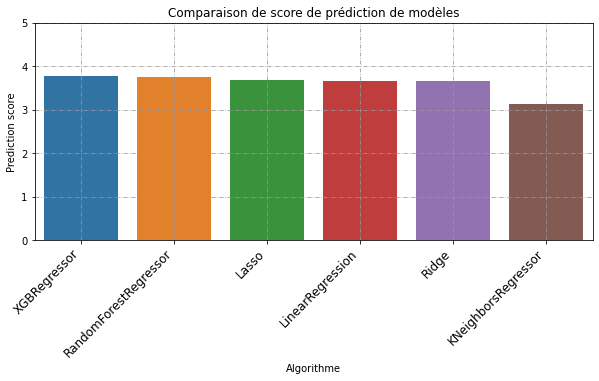

In [1023]:
plt.figure(figsize=(10,4))
plt.title('Comparaison de score de prédiction de modèles')
chart = sns.barplot(x = score_without_EnergyStars['Algorithme'],
           y = score_without_EnergyStars['Prediction score']*5)
chart.set_xticklabels(labels = score_without_EnergyStars['Algorithme'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 5])
plt.grid(True, color='0.6', dashes=(5,2,1,2))
plt.show()

In [1001]:
bes_score = score_without_EnergyStars.merge(score_with_EnergyStars, how = 'outer')

In [1005]:
bes_score.sort_values(by=["Prediction score"],ascending = False)

,Algorithme,Training score,Prediction score,RMSE,MAE,Median abs err
6,XGBRegressor,0.937198,0.862763,540042.863345,8.362501e+05,352245.187500
7,RandomFores...,0.969861,0.846467,576772.388718,8.845098e+05,350596.369959
8,Lasso,0.777954,0.789451,673547.367237,1.035805e+06,440496.917909
9,Ridge,0.779176,0.787560,679668.026583,1.040446e+06,437546.356484
10,LinearRegre...,0.779326,0.784533,681910.399676,1.047832e+06,437245.505404
0,XGBRegressor,0.896470,0.755356,702211.343943,1.087316e+06,418234.421875
1,RandomFores...,0.964531,0.750773,711300.655217,1.097452e+06,400163.937267
2,Lasso,0.731961,0.734279,753427.119761,1.133185e+06,455008.564522
3,LinearRegre...,0.733019,0.733448,754365.912827,1.134956e+06,455379.029121
4,Ridge,0.732762,0.732078,757220.863397,1.137870e+06,456769.511903


# Entrainement sans ENERGYSTARScore 

### Prédiction de l'émissions CO2
***

In [1056]:
y_TotalGHGEmissions= data['TotalGHGEmissions']
X = data.iloc[:, 0:9]


In [1065]:
# pour l'imputation on a choisi SimpleImputer
float_trans = SimpleImputer(strategy="median")

# Et pour l'encodage OneHotEncoder
cat_trans = OneHotEncoder(sparse = False, handle_unknown="ignore")

preprocessor_ = ColumnTransformer(transformers=[
                                ("Numeric", float_trans, make_column_selector(dtype_include = np.number)),
                                ("OneHot" , cat_trans  , make_column_selector(dtype_exclude = np.number)) ],
                               remainder="passthrough")

In [1058]:
# Utilisant la fonction train_split() pour la séparation de jeu donnée
X_train, X_test, y_train, y_test = train_test_split(X, y_TotalGHGEmissions, test_size=0.2)


score_co2 = []
for name_mdl , model in mdl_.items():
    print('Model: ',name_mdl)
    print('prédiction de : ')
    
    pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print('Training score   : ',  pipe.score(X_train,y_train))
    print('Prediction score : ',  pipe.score(X_test, y_test))
    print('RMSE             : ',  mean_absolute_error(y_test,y_pred))
    print('MAE              : ',  np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Median abs err   : ',  median_absolute_error(y_test,y_pred))
    print('')
    score_co2.append([name_mdl, pipe.score(X_train,y_train), pipe.score(X_test, y_test),
                 mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)),
                 median_absolute_error(y_test,y_pred)])
    print('-'*100)
score_without_EnergyStars_co2 = pd.DataFrame(score_co2, columns = ['Algorithme', 'Training score', 
                    'Prediction score','RMSE ','MAE', 'Median abs err' ]).\
                    sort_values(by=["Prediction score"],ascending = False)

Model:  LinearRegression
prédiction de : 
Training score   :  0.4769794149943183
Prediction score :  0.3379984836389317
RMSE             :  30.31578018236129
MAE              :  46.66195543141419
Median abs err   :  19.58325666534221

----------------------------------------------------------------------------------------------------
Model:  Ridge
prédiction de : 
Training score   :  0.4763329420468926
Prediction score :  0.33926497803471534
RMSE             :  30.296087712509603
MAE              :  46.61729888927854
Median abs err   :  19.58061370214356

----------------------------------------------------------------------------------------------------
Model:  Lasso
prédiction de : 
Training score   :  0.0
Prediction score :  -0.0011144678201648883
RMSE             :  41.801958384563534
MAE              :  57.38195113205824
Median abs err   :  38.36911650233524

----------------------------------------------------------------------------------------------------
Model:  KNeighborsRegr

In [1059]:
score_without_EnergyStars_co2

,Algorithme,Training score,Prediction score,RMSE,MAE,Median abs err
5,XGBRegressor,0.806185,0.437002,26.898352,43.031537,16.989791
4,RandomFores...,0.926945,0.422173,27.062010,43.594560,15.835825
1,Ridge,0.476333,0.339265,30.296088,46.617299,19.580614
0,LinearRegre...,0.476979,0.337998,30.315780,46.661955,19.583257
3,KNeighborsR...,1.000000,0.291642,29.141771,48.268066,17.462844
2,Lasso,0.000000,-0.001114,41.801958,57.381951,38.369117


# Entrainement avec ENERGYSTARScore 

### Prédiction de l'émissions CO2
***

In [1066]:
y_TotalGHGEmissions= data['TotalGHGEmissions']
X_ = data.iloc[:, 0:10]

In [1063]:
# Utilisant la fonction train_split() pour la séparation de jeu donnée
X_train, X_test, y_train, y_test = train_test_split(X_, y_TotalGHGEmissions, test_size=0.2)


score_co2_ = []
for name_mdl , model in mdl_.items():
    print('Model: ',name_mdl)
    print('prédiction de : ')
    
    pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print('Training score   : ',  pipe.score(X_train,y_train))
    print('Prediction score : ',  pipe.score(X_test, y_test))
    print('RMSE             : ',  mean_absolute_error(y_test,y_pred))
    print('MAE              : ',  np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Median abs err   : ',  median_absolute_error(y_test,y_pred))
    print('')
    score_co2_.append([name_mdl, pipe.score(X_train,y_train), pipe.score(X_test, y_test),
                 mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)),
                 median_absolute_error(y_test,y_pred)])
    print('-'*100)
score_with_EnergyStars_co2_ = pd.DataFrame(score_co2_, columns = ['Algorithme', 'Training score', 
                    'Prediction score','RMSE ','MAE', 'Median abs err' ]).\
                    sort_values(by=["Prediction score"],ascending = False)

Model:  LinearRegression
prédiction de : 
Training score   :  0.4902417733887757
Prediction score :  -2.329901067312208e+23
RMSE             :  1424942762481.2974
MAE              :  31283903598416.06
Median abs err   :  21.54167672559754

----------------------------------------------------------------------------------------------------
Model:  Ridge
prédiction de : 
Training score   :  0.48964709364083026
Prediction score :  0.4283513282036837
RMSE             :  32.934636399039185
MAE              :  49.002337612956666
Median abs err   :  21.266504168963035

----------------------------------------------------------------------------------------------------
Model:  Lasso
prédiction de : 
Training score   :  0.0
Prediction score :  -0.0025398509947123227
RMSE             :  45.803687869691885
MAE              :  64.89377239019916
Median abs err   :  37.66

----------------------------------------------------------------------------------------------------
Model:  KNeighborsRegressor

In [1064]:
score_with_EnergyStars_co2_

,Algorithme,Training score,Prediction score,RMSE,MAE,Median abs err
4,RandomFores...,0.930238,4.659640e-01,3.010626e+01,4.736281e+01,17.903475
5,XGBRegressor,0.840633,4.625731e-01,3.000327e+01,4.751294e+01,17.196985
1,Ridge,0.489647,4.283513e-01,3.293464e+01,4.900234e+01,21.266504
3,KNeighborsR...,1.000000,4.086764e-01,3.093430e+01,4.983848e+01,17.717074
2,Lasso,0.000000,-2.539851e-03,4.580369e+01,6.489377e+01,37.660000
0,LinearRegre...,0.490242,-2.329901e+23,1.424943e+12,3.128390e+13,21.541677


# Test avec des modèles non paramétrés
***

In [1067]:
# Utilisant la fonction train_split() pour la séparation de jeu donnée
X_train, X_test, y_train, y_test = train_test_split(X_, y_TotalGHGEmissions, test_size=0.2)


score_co2_np = []
for name_mdl , model in mdl.items():
    print('Model: ',name_mdl)
    print('prédiction de : ')
    
    pipe = Pipeline([("preprocessor", preprocessor_),
                     ("scaler", RobustScaler()), 
                     ("estimator", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print('Training score   : ',  pipe.score(X_train,y_train))
    print('Prediction score : ',  pipe.score(X_test, y_test))
    print('RMSE             : ',  mean_absolute_error(y_test,y_pred))
    print('MAE              : ',  np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Median abs err   : ',  median_absolute_error(y_test,y_pred))
    print('')
    score_co2_np.append([name_mdl, pipe.score(X_train,y_train), pipe.score(X_test, y_test),
                 mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)),
                 median_absolute_error(y_test,y_pred)])
    print('-'*100)
score_with_EnergyStars_co2_np = pd.DataFrame(score_co2_np, columns = ['Algorithme', 'Training score', 
                    'Prediction score','RMSE ','MAE', 'Median abs err' ]).\
                    sort_values(by=["Prediction score"],ascending = False)

Model:  LinearRegression
prédiction de : 
Training score   :  0.5000880667003542
Prediction score :  0.4240176794769447
RMSE             :  32.35515300829876
MAE              :  49.43341266063191
Median abs err   :  20.165

----------------------------------------------------------------------------------------------------
Model:  Ridge
prédiction de : 
Training score   :  0.49461668122285196
Prediction score :  0.43189467098772183
RMSE             :  32.00518513723355
MAE              :  49.09422947021778
Median abs err   :  19.889769234138438

----------------------------------------------------------------------------------------------------
Model:  Lasso
prédiction de : 
Training score   :  0.38102421757725147
Prediction score :  0.38652554613636947
RMSE             :  33.45642964065646
MAE              :  51.01692260694876
Median abs err   :  21.450541177430637

----------------------------------------------------------------------------------------------------
Model:  KNeighborsR

In [1068]:
score_with_EnergyStars_co2_np

,Algorithme,Training score,Prediction score,RMSE,MAE,Median abs err
4,RandomFores...,0.931292,0.524492,27.786386,44.915362,16.111250
5,XGBRegressor,0.977748,0.507142,28.452177,45.727448,16.226764
1,Ridge,0.494617,0.431895,32.005185,49.094229,19.889769
0,LinearRegre...,0.500088,0.424018,32.355153,49.433413,20.165000
2,Lasso,0.381024,0.386526,33.456430,51.016923,21.450541
3,KNeighborsR...,0.589998,0.360313,32.113351,52.095448,18.802000
